## Extraction Function

In [1]:
def conference_paper_title_extract(conf_name, year_start, year_end):
    """

    :param conf_name:
    :param year_start:
    :param year_end:
    :return: conference_paper_titles: Dict 以年为Key，Value是List [String]
    """
    import bibtexparser as bp
    from bibtexparser.bparser import BibTexParser
    from bibtexparser.customization import convert_to_unicode
    import os
    cur_dir = os.listdir()
    title_dict = {}

    for i in range(year_start, year_end + 1):
        # long,short,findings,main
        long_titles = []
        short_titles = []
        findings_titles = []
        main_titles = []
        if str(i) + '.' + conf_name + '-long.bib' in cur_dir:
            with open(str(i) + '.' + conf_name + '-long.bib', encoding='UTF-8') as bibfile:
                parser = BibTexParser(common_strings=True)  # 声明解析器类
                parser.customization = convert_to_unicode  # 将BibTeX编码强制转换为UTF编码
                bibdata = bp.load(bibfile, parser)  # 通过bp.load()加载
                long_titles = [item['title'] for item in bibdata.entries][1:]
            # print(len(long_titles))
        if str(i) + '.' + conf_name + '-short.bib' in cur_dir:
            with open(str(i) + '.' + conf_name + '-short.bib', encoding='UTF-8') as bibfile:
                parser = BibTexParser(common_strings=True)  # 声明解析器类
                parser.customization = convert_to_unicode  # 将BibTeX编码强制转换为UTF编码
                bibdata = bp.load(bibfile, parser)  # 通过bp.load()加载
                short_titles = [item['title'] for item in bibdata.entries][1:]
                # print(len(short_titles))
        if str(i) + '.' + conf_name + '-findings.bib' in cur_dir:
            with open(str(i) + '.' + conf_name + '-findings.bib', encoding='UTF-8') as bibfile:
                parser = BibTexParser(common_strings=True)  # 声明解析器类
                parser.customization = convert_to_unicode  # 将BibTeX编码强制转换为UTF编码
                bibdata = bp.load(bibfile, parser)  # 通过bp.load()加载
                findings_titles = [item['title'] for item in bibdata.entries][1:]
        if str(i) + '.' + conf_name + '-main.bib' in cur_dir:
            with open(str(i) + '.' + conf_name + '-main.bib', encoding='UTF-8') as bibfile:
                parser = BibTexParser(common_strings=True)  # 声明解析器类
                parser.customization = convert_to_unicode  # 将BibTeX编码强制转换为UTF编码
                bibdata = bp.load(bibfile, parser)  # 通过bp.load()加载
                main_titles = [item['title'] for item in bibdata.entries][1:]
        title_dict[i] = main_titles + short_titles + long_titles + findings_titles
    print(conf_name + ":")
    for year in title_dict.keys():
        print(str(year) + ":" + str(len(title_dict[year])))
    return title_dict

## 四会议标题抽取

In [2]:
acl_dict = conference_paper_title_extract("acl", 2018, 2022)
emnlp_dict = conference_paper_title_extract("emnlp", 2018, 2022)
naacl_dict = conference_paper_title_extract("naacl", 2018, 2022)
coling_dict = conference_paper_title_extract("coling", 2018, 2022)

acl:
2018:381
2019:660
2020:778
2021:1167
2022:1031
emnlp:
2018:549
2019:681
2020:751
2021:847
2022:0
naacl:
2018:330
2019:423
2020:0
2021:477
2022:651
coling:
2018:330
2019:0
2020:612
2021:0
2022:0


## 按年归类
1. ACL 18-22
2. EMNLP 18-21
3. NAACL 18-19, 21-22
4. COLING 18, 20

In [3]:
year_dict = {}
for i in range(2018, 2023):
    year_dict[i] = acl_dict[i] + emnlp_dict[i] + naacl_dict[i] + coling_dict[i]
    with open(str(i) + "_all_paper.txt", "w",encoding="UTF-8") as f:
        for title in year_dict[i]:
            f.write(title + "\n")
for year in year_dict.keys():
    print(len(year_dict[year]))

1590
1764
2141
2491
1682


## 情感过滤

In [4]:
def belong_sa_field(title):
    title = title.lower()
    for senti_word in senti_vob:
        if senti_word in title:
            return True
    splitted = title.split()
    if "mental" in splitted or "stance" in splitted:
        return True
    # Rule1:Argument 抽取
    if "argument" in title and "event" not in title:
        return True
    # Rule2: Implicit hate抽取
    if "implicit" in title and "hate" in title:
        return True


senti_vob = ["emotion", "sentiment", "affective", "empath", "depress", "sarcasm", "humor", "metaphor"]
senti_paper_dict = {}
for i in range(2018, 2023):
    senti_titles = []
    for title in year_dict[i]:
        if belong_sa_field(title):
            senti_titles.append(title)
    senti_paper_dict[i] = senti_titles


for year in senti_paper_dict.keys():
    print(len(senti_paper_dict[year]))
    with open(str(year) + "_senti_titles.txt", "w", encoding="UTF-8") as f:
        for title in senti_paper_dict[year]:
            f.write(title + "\n")



122
113
136
132
69


## 逐会议汇总

In [5]:
# acl_5_titles = []
# for year in acl_dict.keys():
#     acl_5_titles += acl_dict[year]
# print(acl_5_titles[:5])
#
# emnlp_4_titles = []
# for year in emnlp_dict.keys():
#     emnlp_4_titles += emnlp_dict[year]
# print(emnlp_4_titles[:5])
#
# naacl_4_titles = []
# for year in naacl_dict.keys():
#     naacl_4_titles += naacl_dict[year]
# print(len(naacl_4_titles))

## Title Preprocess

In [12]:
from collections import Counter
import re

counter_dict = {}

for year in range(2018, 2023):
    counter = Counter()
    for title in senti_paper_dict[year]:
        title = (
            title.lower()
            .replace(" multi-ling", " multiling")
            .replace("multi-modal ", "multimodal ")
            # .replace(" cross-ling", " cross-ling")
            .replace(" cross-modal", " crossmodal")
            .replace(" representation ", " representations ")
            .replace(" model ", " models ")
            .replace(" machine ", " machine-")
            .replace(" classification", "-classification")
            .replace(" extraction", "-extraction")
            .replace(" detection", "-detection")
            .replace(" recognition", "-recognition")
            .replace(" question ", " question-")
            .replace(" open domain ", " open-domain ")
            .replace(" language model", " langauge-model")
            .replace(" named ", " named-")
            .replace("pretrain", "pre-train")
            .replace(" dialog ", " dialogue ")
            .replace("conversational ", "conversation ")
            .replace(" conversations", " conversation")
            .replace("conversation", "conversation-dialog")
            .replace("dialogue", "conversation-dialog")
            .replace(" generation", "-generation")
            # .replace("emotion-recognition ", "emotion-recognition-")
            .replace("pre-trained", "pre-train")
            .replace("pre-training", "pre-train")
            .replace(" prediction","-prediction")
            .replace("depressive", "depression")
            .replace("empathy", "empathetic")
            .replace(" aware", "-aware")
            .replace("depression-detection", "depression")
        )
        splitted = title.split()
        counter.update(splitted)
    counter_dict[year] = counter
for year in range(2018, 2023):
    print(year)
    print(counter_dict[year].most_common(50))

2018
[('for', 57), ('sentiment', 39), ('analysis', 30), ('and', 30), ('in', 29), ('of', 28), ('with', 24), ('sentiment-classification', 20), ('a', 20), ('learning', 18), ('neural', 14), ('the', 13), ('modeling', 13), ('network', 13), ('attention', 11), ('networks', 9), ('using', 9), ('emotion', 9), ('word', 8), ('argumentation', 8), ('aspect', 8), ('corpus', 7), ('joint', 7), ('memory', 7), ('data', 6), ('conversation-dialog', 6), ('multi-task', 6), ('representations', 6), ('argument', 5), ('deep', 5), ('on', 5), ('from', 5), ('domain', 4), ('embeddings', 4), ('aspect-level', 4), ('information', 4), ('by', 4), ('emotional', 4), ('end-to-end', 4), ('to', 4), ('aspect-based', 4), ('online', 4), ('an', 4), ('emotions', 4), ('predicting', 3), ('arguments', 3), ('role', 3), ('humor-recognition', 3), ('mining', 3), ('japanese', 3)]
2019
[('for', 53), ('sentiment', 33), ('and', 32), ('analysis', 25), ('a', 25), ('in', 22), ('with', 21), ('learning', 17), ('of', 17), ('sentiment-classification

In [13]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_sa = [
    "",
    "deep",
    "learning",
    "neural",
    "network",
    "networks",
    "via",
    "using",
    "based",
    "towards",
    "text",
    "natural",
    "language",
    "model",
    "models",
    "approach",
    "improving",
    "sentiment",
    "analysis",
    "emotion",
    "graph",
    "word",
    "corpus",
    "joint",
    "data",
    "emotions",
    "online",
    "modeling",
    "predicting",
    "tweets",
    "tasks"
]

In [36]:
keyword_list_dict = {}
for year in range(2018, 2023):
    keywords = []
    for w in counter_dict[year].most_common():
        if w[0] not in stopwords.words('english') and w[0] not in stopwords_sa:
            keywords.append(w)
    keyword_list_dict[year] = keywords

for year in range(2018, 2023):
    print(len(keyword_list_dict[year]))
    print(keyword_list_dict[year][:50])

437
[('sentiment-classification', 20), ('attention', 11), ('argumentation', 8), ('aspect', 8), ('memory', 7), ('conversation-dialog', 6), ('multi-task', 6), ('representations', 6), ('argument', 5), ('domain', 4), ('embeddings', 4), ('aspect-level', 4), ('information', 4), ('emotional', 4), ('end-to-end', 4), ('aspect-based', 4), ('arguments', 3), ('role', 3), ('humor-recognition', 3), ('mining', 3), ('japanese', 3), ('structure', 3), ('cross-domain', 3), ('metaphor', 3), ('identification', 3), ('multimodal', 3), ('hierarchical', 3), ('languages', 3), ('transfer', 3), ('emotion-classification', 3), ('level', 3), ('social', 3), ('media', 3), ('emotion-detection', 3), ('contextual', 3), ('co-attention', 3), ('stance-detection', 3), ('automatic', 3), ('construction', 2), ('jointly', 2), ('semantic', 2), ('exploiting', 2), ('knowledge', 2), ('discourse', 2), ('weak', 2), ('labeled', 2), ('enhanced', 2), ('unlabeled', 2), ('without', 2), ('prior', 2)]
422
[('sentiment-classification', 14), (

## Weighted-Word-Cloud

In [37]:
# print(keyword_dict[2020][:5])   # list
keyword_freq_dict = {}
total_word_num_dict = {}
weighted_kw_freq_dict = {}

for year in range(2018, 2023):
    keyword_freq_dict[year] = dict(keyword_list_dict[year])

# 统计总次数
for year in range(2018, 2023):
    sum = 0
    for keyword in keyword_freq_dict[year].keys():
        sum += keyword_freq_dict[year][keyword]
    total_word_num_dict[year] = sum
    print(str(year) + ":" + str(sum))

# 构造加权词频，/去年的词频，即*去年逆词频(iwf)
for year in range(2019, 2023):
    weighted_kw_freq_dict[year] = {}
    for keyword in keyword_freq_dict[year].keys():
        if keyword in keyword_freq_dict[year - 1].keys():
            iwf = total_word_num_dict[year - 1] / keyword_freq_dict[year - 1][keyword]
        else:
            iwf = total_word_num_dict[year - 1] / 0.5
        new_freq = keyword_freq_dict[year][keyword] * iwf
        weighted_kw_freq_dict[year][keyword] = new_freq

print(weighted_kw_freq_dict[2020]["depression"])

2018:627
2019:612
2020:717
2021:689
2022:418
3
1836.0


## top keywords in Sentiment Analysis (2018-2022)

In [55]:
print(keyword_freq_dict[2021]["cognitive"])
# print(weighted_kw_freq_dict[2022]["depression"])

2


In [38]:
def draw_topk_freq_plot(k, keyword_dict, year_start, year_end, weighted=False):
    """

    :param k:
    :param keyword_dict: Key: year, Value: List[Tuple(word, freq)]
    :param year_start:
    :param year_end:
    :return:
    """
    import random
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    %matplotlib inline

    for year in range(year_start, year_end + 1):
        plt.rcdefaults()
        fig, ax = plt.subplots(figsize=(8, 12))

        top_k = k
        key = [k[0] for k in keyword_dict[year][:top_k]]
        value = [k[1] for k in keyword_dict[year][:top_k]]
        y_pos = list(range(len(key)))

        ax.barh(y_pos, value, align="center", color=random.sample(mcolors.cnames.items(), 1)[0], ecolor='black', log=True)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(key, rotation=0, fontsize=10)
        ax.invert_yaxis()

        for i, v in enumerate(value):
            ax.text(v + 1, i + .25, str(v), color='black', fontsize=10)
        ax.set_xlabel("Frequency", fontsize=12)
        ax.set_title(f"Top {k} Keywords in Sentiment Analysis in Year " + str(year), fontsize=12)
        if weighted is True:
            plt.savefig("figure/" + str(year) + "-weighted-sa-keywords.png", bbox_inches="tight")
        else:
            plt.savefig("figure/" + str(year) + "-sa-keywords.png", bbox_inches="tight")
        plt.show()

## 加权词频可视化

[('understanding', 5016.0), ('capsule', 3762.0), ('new', 3762.0), ('tree', 3762.0), ('unsupervised', 3762.0), ('bert', 3762.0), ('dataset', 2508.0), ('stance', 2508.0), ('feature', 2508.0), ('fusion', 2508.0), ('open-domain', 2508.0), ('labels', 2508.0), ('modular', 2508.0), ('finding', 2508.0), ('linguistic', 2508.0), ('multi-view', 2508.0), ('texts', 2508.0), ('peer', 2508.0), ('detecting', 2508.0), ('label', 2508.0)]


C:\Users\13080\AppData\Local\Temp\ipykernel_2700\2963518500.py:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ax.barh(y_pos, value, align="center", color=random.sample(mcolors.cnames.items(), 1)[0], ecolor='black', log=True)


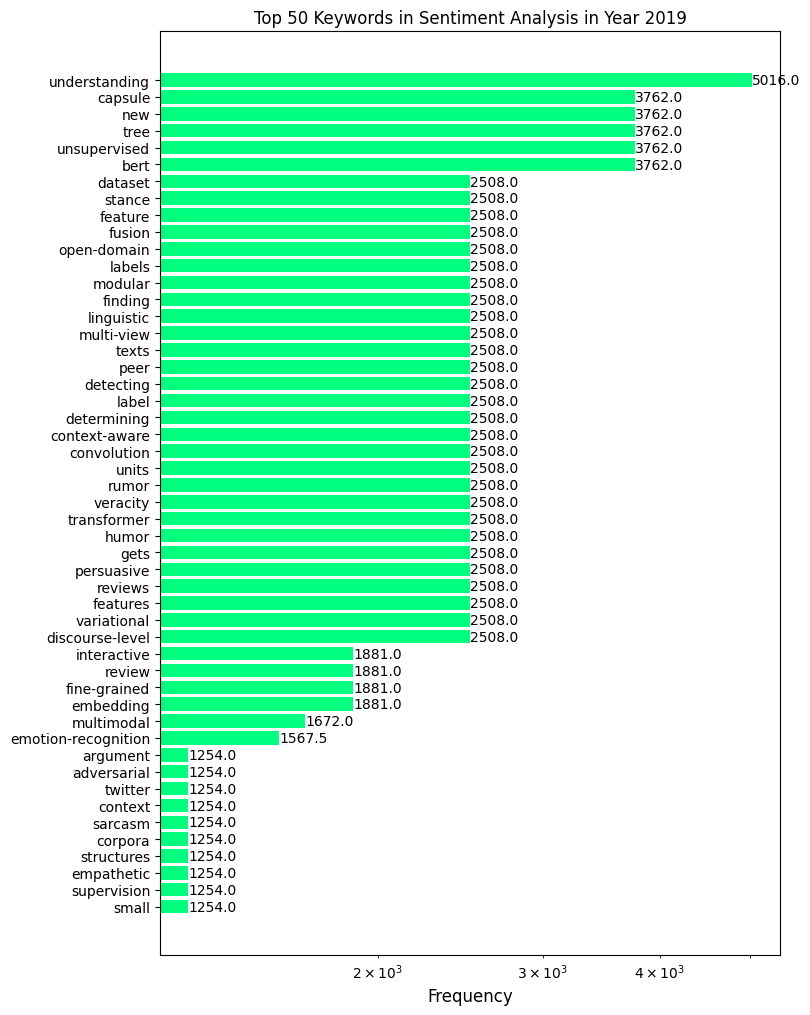

C:\Users\13080\AppData\Local\Temp\ipykernel_2700\2963518500.py:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ax.barh(y_pos, value, align="center", color=random.sample(mcolors.cnames.items(), 1)[0], ecolor='black', log=True)


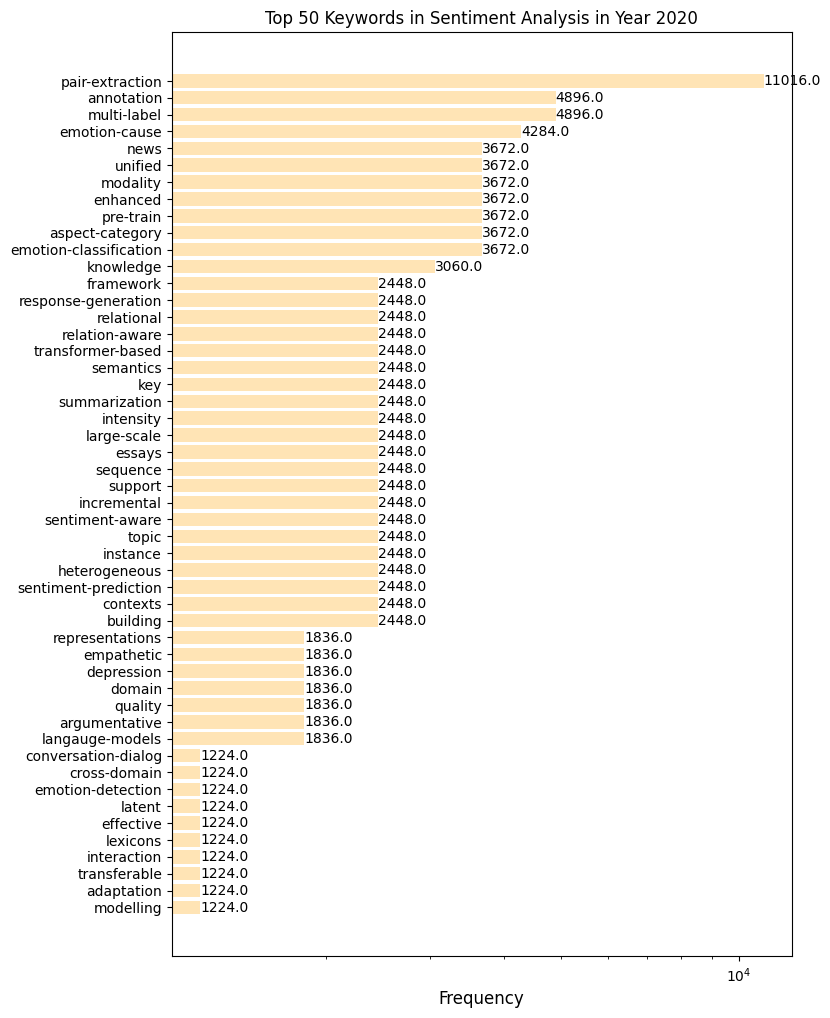

C:\Users\13080\AppData\Local\Temp\ipykernel_2700\2963518500.py:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ax.barh(y_pos, value, align="center", color=random.sample(mcolors.cnames.items(), 1)[0], ecolor='black', log=True)


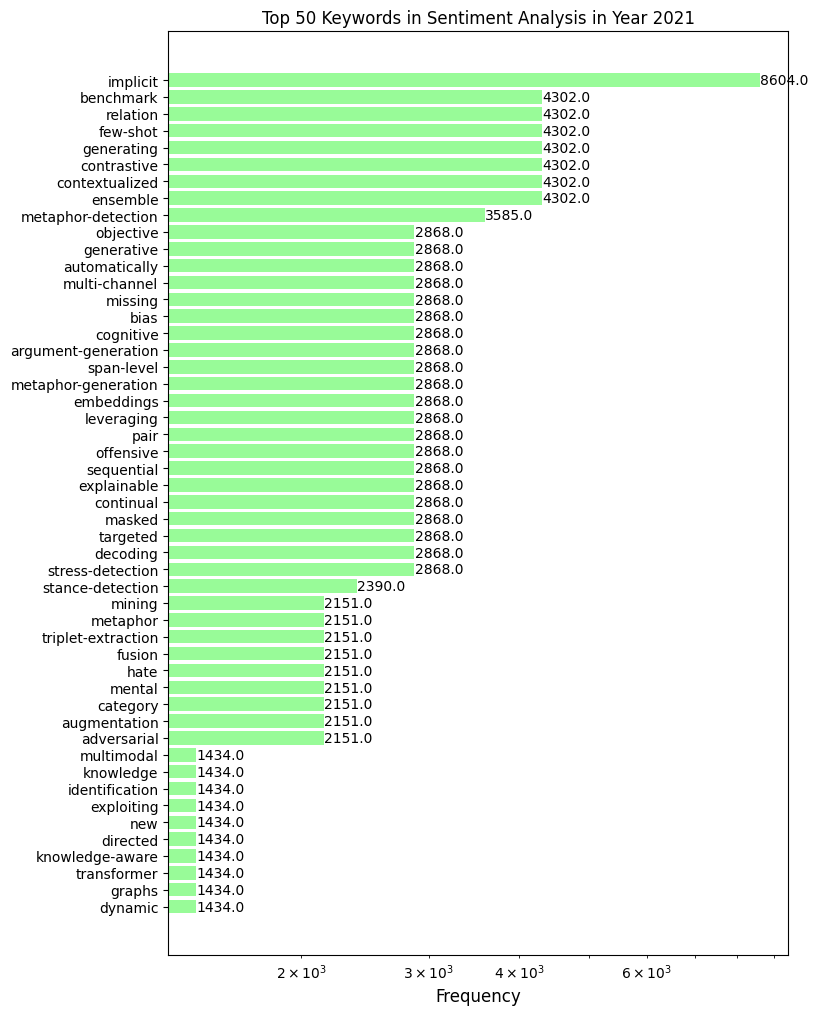

C:\Users\13080\AppData\Local\Temp\ipykernel_2700\2963518500.py:24: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ax.barh(y_pos, value, align="center", color=random.sample(mcolors.cnames.items(), 1)[0], ecolor='black', log=True)


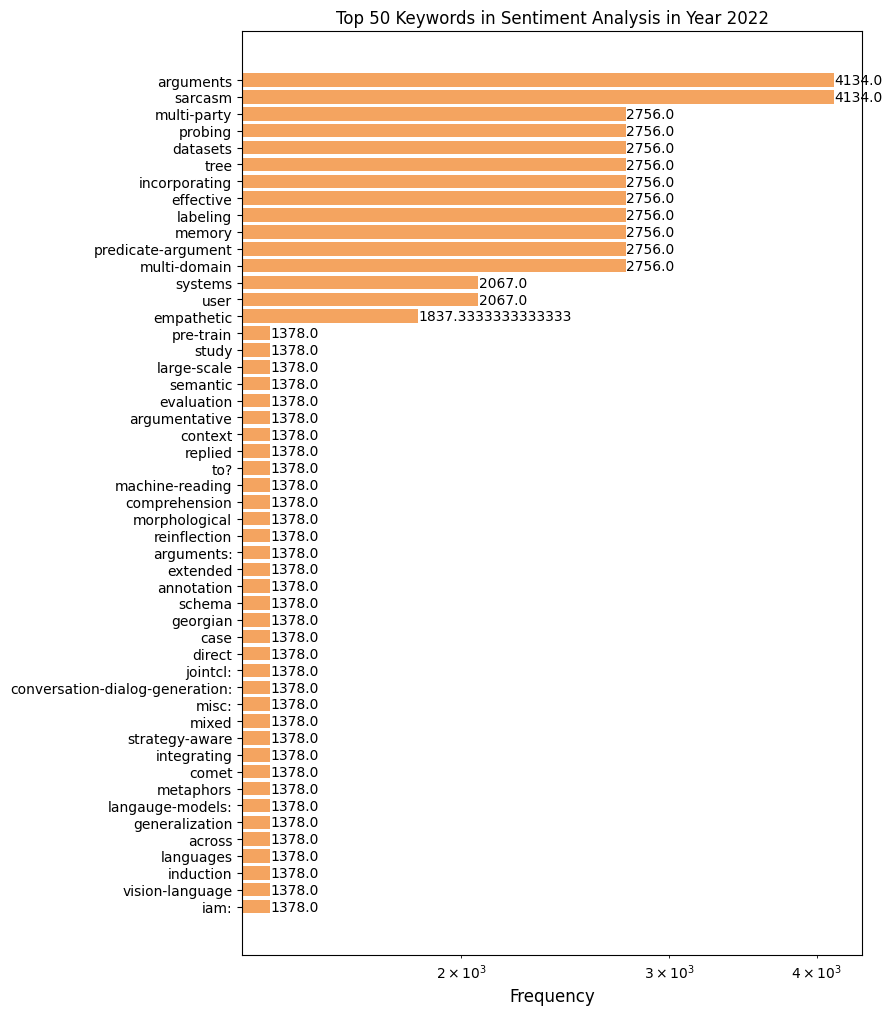

In [39]:
weighted_kw_list_dict = {}
for year in range(2019, 2023):
    weighted_kw_list_dict[year] = list(zip(weighted_kw_freq_dict[year].keys(),weighted_kw_freq_dict[year].values()))
    weighted_kw_list_dict[year].sort(key=lambda x:x[1],reverse=True)
print(weighted_kw_list_dict[2019][:20])

draw_topk_freq_plot(50, weighted_kw_list_dict, 2019, 2022, weighted=True)

## Word Cloud in SA

In [56]:
def draw_word_cloud(keyword_dict, year_start, year_end, weighted=False):
    """

    :param keyword_dict: keyword_list_dict: Key: year, Value: List[Tuple(word, freq)]
    :param year_start:
    :param year_end:
    :return:
    """
    # Show the word cloud forming by keywords
    from wordcloud import WordCloud
    from matplotlib import cm
    import random
    import matplotlib.pyplot as plt

    for year in range(year_start, year_end + 1):
        cmap = random.sample(list(cm.datad.keys()), 1)[0]
        wordcloud = WordCloud(max_font_size=100,
                              max_words=100,
                              width=1280,
                              height=640,
                              colormap="tab10",
                              background_color="white").generate_from_frequencies(dict(keyword_dict[year]))
        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        if weighted is False:
            plt.savefig("figure/" + str(year) +"sa-wordcloud.png", bbox_inches="tight")
        else:
            plt.savefig("figure/" + str(year) +"-weighted-sa-wordcloud.png", bbox_inches="tight")
        plt.show()

## 加权word-cloud绘制

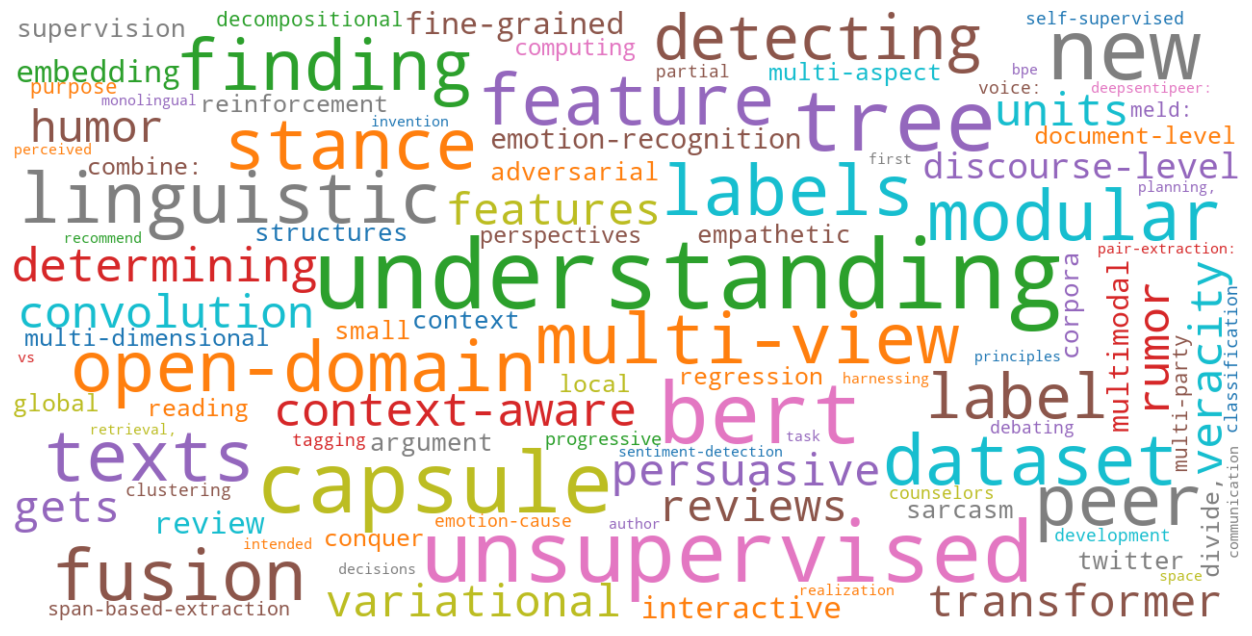

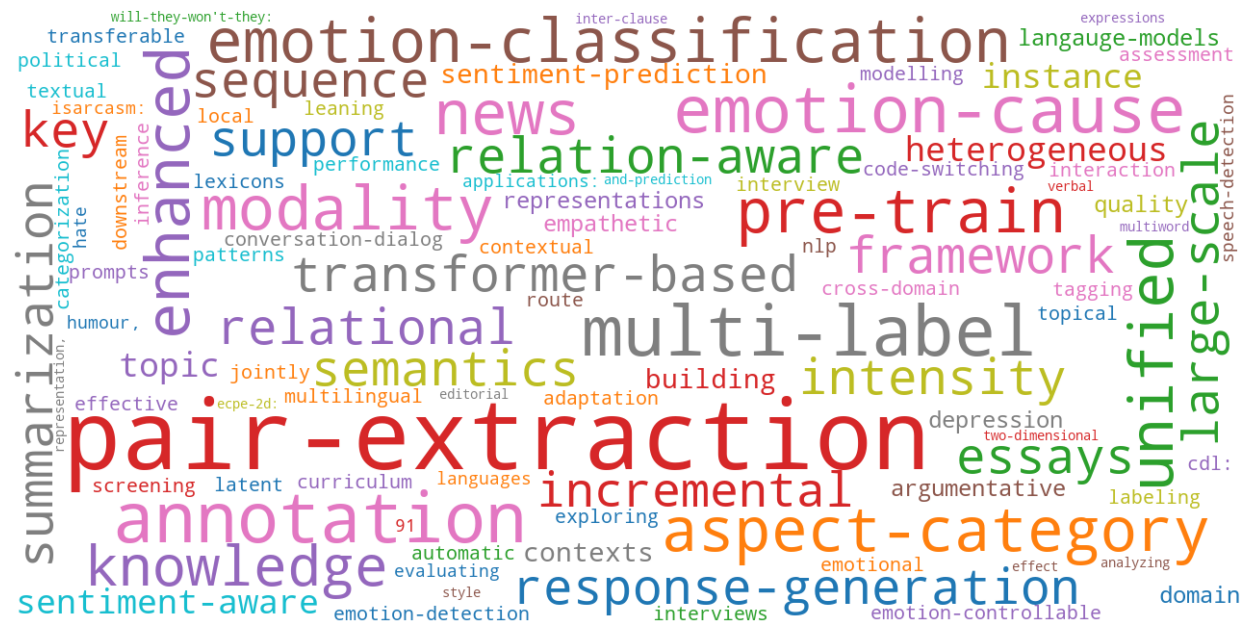

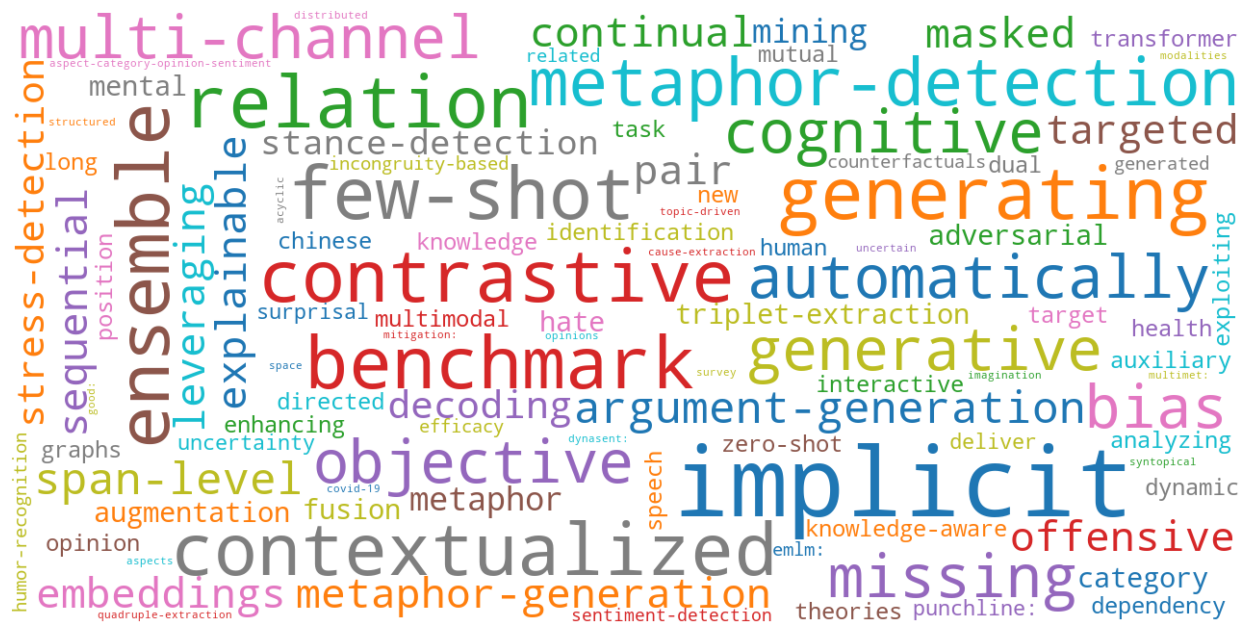

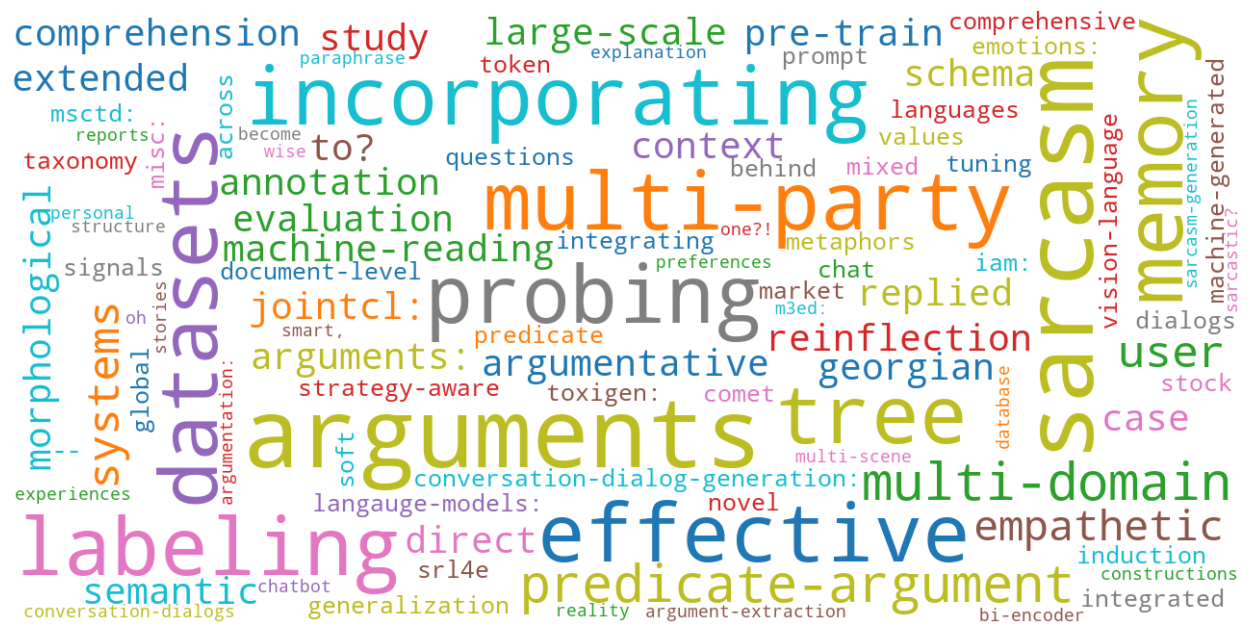

In [57]:
draw_word_cloud(weighted_kw_list_dict,2019, 2022, True)